In [1]:
import aocd
import numpy as np
import matplotlib.pyplot as plt

from itertools import pairwise
from operator import itemgetter
from skimage.segmentation import flood

In [2]:
data = aocd.get_data(day=12, year=2024)
grid = np.array([[ord(c) for c in line] for line in data.splitlines()])

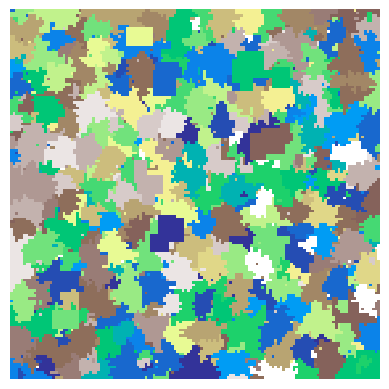

In [3]:
plt.axis(False)
plt.imshow(grid, interpolation='none', cmap='terrain')

In [4]:
def perimeter(region):
    p = 0
    for x, y in region:
        p += sum(neighbor not in region for neighbor in ((x, y+1), (x, y-1), (x+1, y), (x-1, y)))
    return p

def sides(region):
    n, e, s, w = [], [], [], []
    for x, y in region:
        n += [(x-1, y)] if (x-1, y) not in region else []
        s += [(x+1, y)] if (x+1, y) not in region else []
        w += [(x, y-1)] if (x, y-1) not in region else []
        e += [(x, y+1)] if (x, y+1) not in region else []
    return segments(n, 0) + segments(s, 0) + segments(w, 1) + segments(e, 1)

def segments(neighbors, axis):
    border = sorted(neighbors, key=itemgetter(axis, axis-1))
    return 1 + sum(a[axis] != b[axis] or a[1-axis]+1 < b[1-axis] for a, b in pairwise(border))

In [5]:
regions = []
pixels = set(idx for idx, _ in np.ndenumerate(grid))
while pixels:
    seed = pixels.pop()
    flooded = flood(grid, seed, connectivity=1)
    region = set(zip(*np.where(flooded)))
    pixels -= region
    regions.append(region)

print("Part 1:", sum(len(r) * perimeter(r) for r in regions))
print("Part 2:", sum(len(r) * sides(r) for r in regions))

Part 1: 1359028
Part 2: 839780
